# Laboratory Exercise 7
Causal and Non-Causal Systems

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Problem 1: Digital Filtering in Signal Processing (Causal System)**

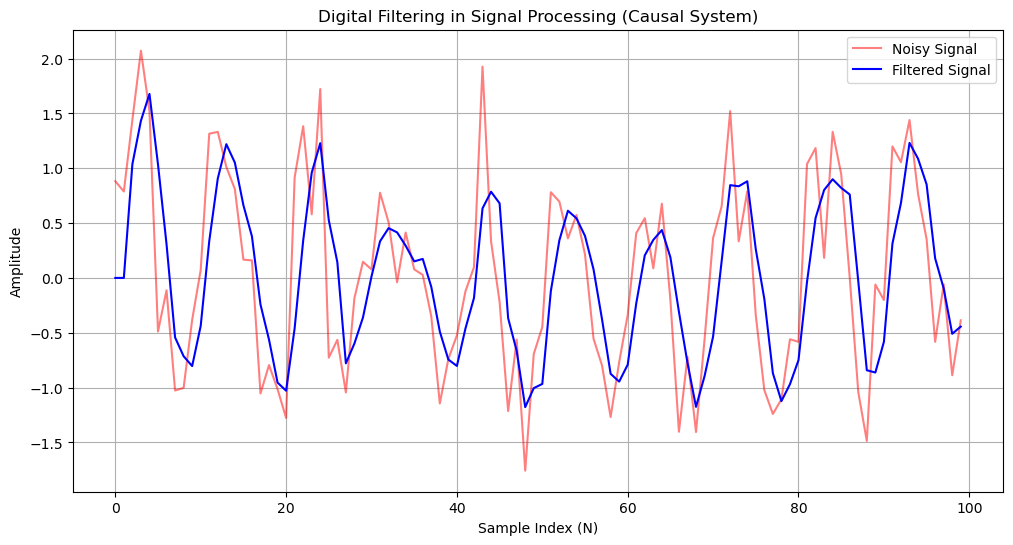

In [77]:
N = 100
frequency = 0.1  
np.random.seed(0) 

n = np.arange(N)
clean_signal = np.sin(2 * np.pi * frequency * n)

noise = np.random.normal(0, 0.5, N)  
noisy_signal = clean_signal + noise

def moving_average_filter(signal):
    filtered_signal = np.zeros_like(signal)
    for n in range(len(signal)):
        if n >= 2:
            filtered_signal[n] = (signal[n] + signal[n-1] + signal[n-2]) / 3
        else:
            filtered_signal[n] = 0
    return filtered_signal

filtered_signal = moving_average_filter(noisy_signal)

plt.figure(figsize=(12, 6))
plt.plot(n, noisy_signal, label='Noisy Signal', color='red', alpha=0.5)
plt.plot(n, filtered_signal, label='Filtered Signal', color='blue')
plt.title('Digital Filtering in Signal Processing (Causal System)')
plt.xlabel('Sample Index (N)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

**Problem 2: Stock Price Prediction (Non-Causal System)**

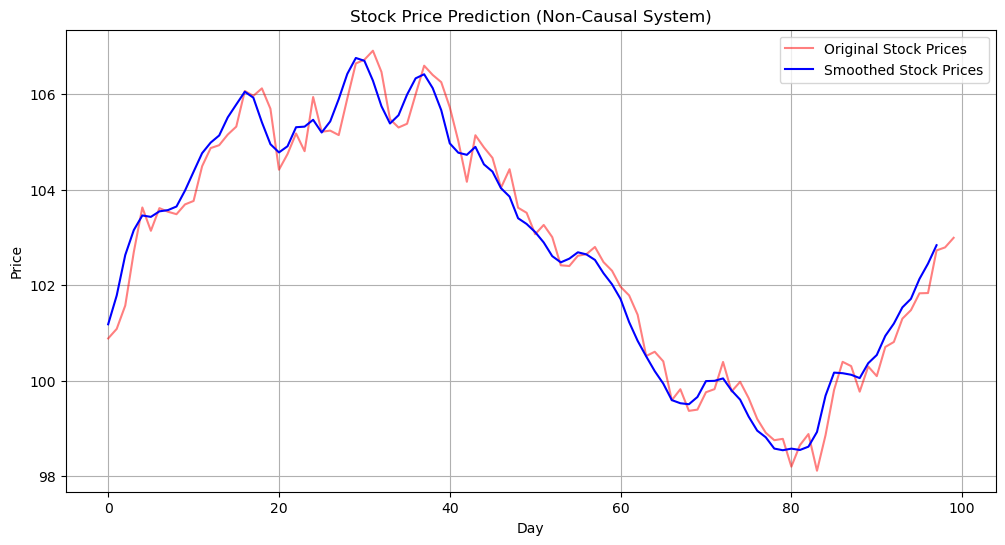

In [84]:
N = 100
np.random.seed(0) 
base_price = 100
noise = np.random.normal(0, 0.5, N) 
stock_prices = base_price + noise.cumsum()  

def non_causal_moving_average(signal, window_size):
    padded_signal = np.pad(signal, (window_size // 2, window_size // 2), mode='edge')
    filtered_signal = np.zeros_like(signal)
    
    for n in range(1, len(signal) - 1):  
        filtered_signal[n] = np.mean(padded_signal[n:n + window_size])
        
    return filtered_signal

window_size = 3
smoothed_prices = non_causal_moving_average(stock_prices, window_size)
smoothed_prices = smoothed_prices[1:-1]

plt.figure(figsize=(12, 6))
plt.plot(stock_prices, label='Original Stock Prices', color='red', alpha=0.5)
plt.plot(smoothed_prices, label='Smoothed Stock Prices', color='blue')
plt.title('Stock Price Prediction (Non-Causal System)')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

**Problem 3: Echo Cancellation in Telecommunications (Causal System)**


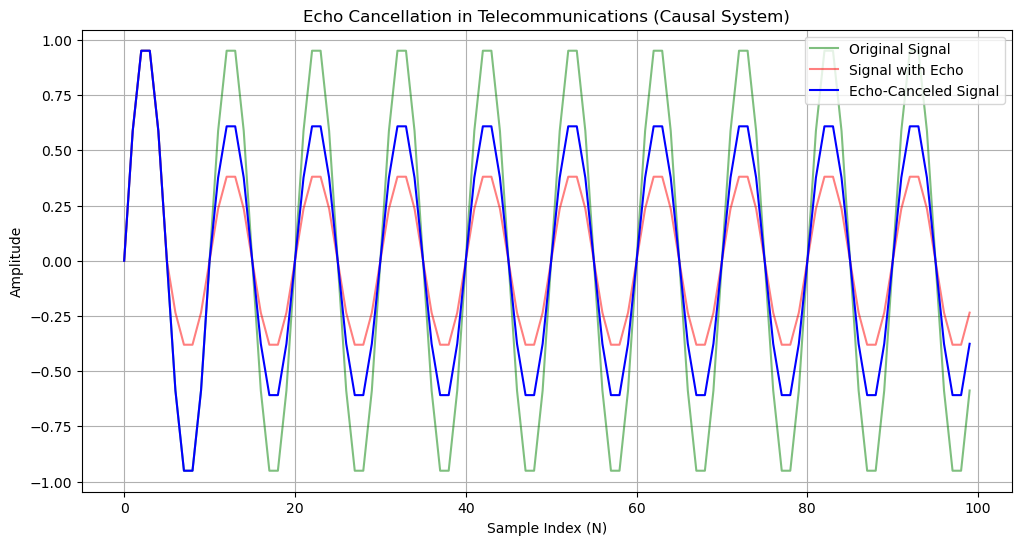

In [97]:
N = 100
frequency = 0.1 
n = np.arange(N)

original_signal = np.sin(2 * np.pi * frequency * n)

delay = 5
alpha = 0.6

echo_signal = np.zeros_like(original_signal)
echo_signal[delay:] = original_signal[:-delay] * alpha

signal_with_echo = original_signal + echo_signal

def cancel_echo(signal, alpha, delay):
    output_signal = np.zeros_like(signal)
    for n in range(len(signal)):
        if n >= delay:
            output_signal[n] = signal[n] - (alpha * signal[n - delay])
        else:
            output_signal[n] = signal[n] 
    return output_signal

canceled_signal = cancel_echo(signal_with_echo, alpha, delay)

plt.figure(figsize=(12, 6))
plt.plot(n, original_signal, label='Original Signal', color='green', alpha=0.5)
plt.plot(n, signal_with_echo, label='Signal with Echo', color='red', alpha=0.5)
plt.plot(n, canceled_signal, label='Echo-Canceled Signal', color='blue')
plt.title('Echo Cancellation in Telecommunications (Causal System)')
plt.xlabel('Sample Index (N)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()